<a href="https://colab.research.google.com/github/dgalassi99/quant-trading-self-study/blob/main/00_books/Advances_in_Financial_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advances in Financial Machine Learning - Resume

## Section 1 - Data Analysis

### Financial Data Structures

#### Types of Financial Data

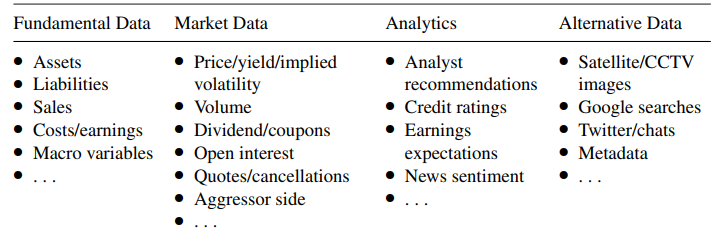

**Fundamental Data**

Mostly accounting data reported quarterly. Those have low frequency and can be used in coupling with higher frequency data.

 Typical issues?

1. Data are reported with a lapse. For example Bloomberg data are indexed by the last date included into the report, which preceeds the releasing date. Make sure to be aligned!
2. Backfilling occurs. That is filling missing data a posteriori.
3. Reinstating values. That is changing a value that wa originally mistaken. For example we have 3 vlaues for GDP, the original release and two following corrections. Using the correection in an analysis were these corrections were not yet made creates errors!

**Market Data**

Trading activities taking place in an exchange. It is high frequency, not trivial to process and abundant (over 10 TB daily)

**Analytics**

Derivative data from fundamental, market or primary analytic data. So th emain thing to take in consideration i that these data are pre-processed by somebody. Hence, these migh be expensive and also biased!

**Alternative Data**

Data produced by individuals (social media, web searches...) or by businesses (transactions,...) or sensors (CCTV, satellites,...)

#### Bars

To apply ML we need to parse data in a regular format. We need to create tables with rows or bars

The goal is to transform a series of observetions at an irregular frequency into an homogeneous sample

**Time Bars**

Obtained by sampling information at fixed time intervals (timestamp, open, close, volume, ...). Even if the most popular they should be avoided.
1. Markets do not process information at a constant time interval. For example open and close hours are more active. Hnece we risk oversampling infomration when the markets are more active.
2. Exhibit poor statistical properties (heteroscedasticity, non-normality,...)

**Tick Bars**

Tick bars aggregate data after a fixed number of transactions (like 1,000 trades). This ties the analysis directly to market activity instead of time, making it a proxy for the arrival of new information in the market. Tick bars are more likely to be gaussian distributed, which is a common assumption in many ML methods.

**Volume Bars**

Tick bars can have a problem, an order of 10 shares is one tick, while 10 orders of 1 share are 10 transactions. Volume bars solve this issue by sampling every time a pre-defined number of shares. Example, sample prices everytime a contract exchanges 100 units, regardless the number of ticks involved.

**Dollar Bars**

Sampling an obs everytime a pre-defined market value is exchanged. Why?
1. If a stock appreciates 100% in X years, it will take half of stockts traded to get the same volume. Hnece, with significant price fluctuations dollar bars appear to be the best choice.
2. The number of outstanding shares changes due to corporate decisions. Dollar bars are robust agains security issues, splits and buybacks


For info on *information-driven bars* see pages 29-32

#### Multi-product Series

If we need to model more instruments with dynamically adjustable weights or deal with products paying irregular coupons/dividends we may have issues. How can we solve it? ... the ETF trick

Suppose we have a series of bars with columns:
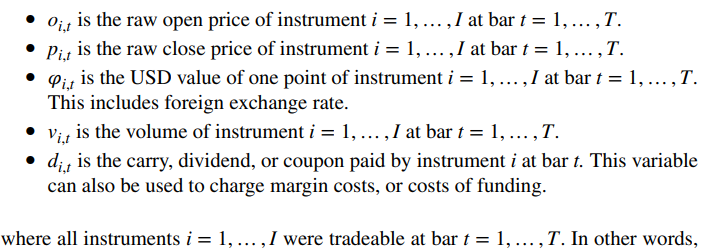

**The ETF Trick**

In constructing a trading strategy that invests in a spread of futures contracts, we face complications such as dynamically changing weight vectors ωt
 , the possibility of negative spread values, and misaligned trading times among instruments. To manage this, we can represent the spread as the value of $1 invested in a synthetic portfolio — akin to an ETF — whose time series {Kt} captures cumulative PnL and stays strictly positive. For a basket of futures characterized by weights ωT rebalanced on bars b, the holdings are given by:

 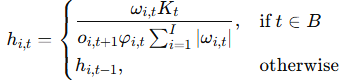

where oi,t+1 is the opening price (used as proxy if the next period's price is unknown) and ϕi,t converts to USD. The change in price is measured by:

 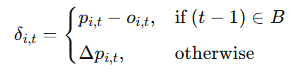

 Allowignthe portfolio value to evolve:

 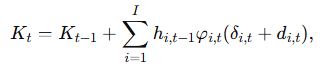

 With dividends or carry di,t included.

 We can also include transaction costs.
 - Rebalancing cost (τi is per dollar transaction cost)
 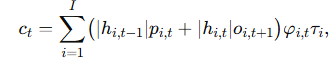

 - bid-ask cost
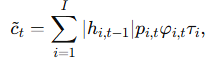
 - liquidity through
 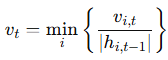

 Together, this transforms a complex multi-leg spread into a well-defined positive-valued time series that integrates PnL, transaction costs, and liquidity constraints — making it directly usable for modeling, signal generation, and execution.

**PCA Weights**

Consider an IID multivariate Gaussian with mean vector m (Nx1) and covar matrix V (NxN). Typical stochastic process describing the returns of stocks, yields in bonds... for a portfolio of N instruments.

*Compute the vector of allocations 𝛚 that conforms to a particular distribution of risks across V's principal components...*

1. Spectral decomposition VW=WA with W columns ordered such that the diagonal elements of A are sorted in descending order
2. Given ω the portfolio risk σ^2 = ω'Vω = ω'WAW'ω = b'Ab
3. A is diagonal, thus  σ^2 =sum(bn^2*An,n) [n=1,...,N] and the risk attributed to the nth component ir Rn = bn^2*An,n*σ^-2. {Rn} is the distribution of risks across the orth. components
4. To find ω deviverying a distribution of risk R we have b = σ*sqrt(Rn/An,n) allocation in the new basis
5. The allocation in th eold basis is ω = Wb

#### Sampling Features


So far we have learned how to produce a continuous, homogeneous, and structured
dataset from a collection of unstructured financial data. Although you could attempt to apply an ML algorithm on such a dataset, in general that would not be a good idea.
1. Several ML algorithms do not scale well with sample size (e.g., SVMs).
2. ML algorithms achieve highest accuracy when they attempt to
learn from relevant examples. Suppose that you wish to predict whether the next 5% absolute return will be positive or negative. The accuracy of such a prediction will be low. However, if we ask a classifier to predict the sign of the next 5% absolute return after certain catalytic conditions, we are more likely to find informative features that will help us achieve a more accurate prediction.

In this section we discuss ways of sampling bars to produce a features
matrix with relevant training examples.

**Sampling for Reduction**

Downsampling by sequential or randomply (uniform distribution).

**Event-Based Sampling**

Release of macro statistics, geopoliticla news... we look for events that are significant.

*CUSUM Filter*
The CUSUM filter (Cumulative Sum filter) is a statistical method originally used for quality control, designed to detect shifts in the mean of a time series from a target level. In trading, it’s used to spot meaningful moves in prices or returns that stand out from typical noise.

We start with a sequence of observations {yt} (t=1,...,T), assumed to come from a locally stationary process (meaning the data is roughly stable over short periods).

The CUSUM filter keeps track of cumulative deviations St = max(0,St-1 + yt -E(yt)) with S0 = 0. If the series yt goes higher for some periods St grows, when there is a drop St is reinitialized to 0.

The event is triggered when St > threshold

There also exist a symmetric version

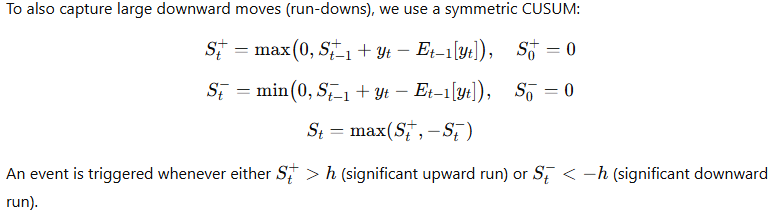

*Why is it useful?*

Unlike methods like Bollinger Bands that can fire multiple signals when prices hover around a level, the CUSUM filter requires a full run of magnitude h. This means fewer false signals and more meaningful event detection.

In finance, we can use this to sample event-driven bars: only keep observations where the process moved significantly. Later, machine learning can learn if these events have predictive power.



#### Exercises

On a series of E-mini S&P 500 futures tick data:
- Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.
-  Count the number of bars produced by tick, volume, and dollar bars on a
weekly basis. Plot a time series of that bar count. What bar type produces
the most stable weekly count? Why?
- Compute the serial correlation of returns for the three bar types. What bar
method has the lowest serial correlation?
REFERENCES 41
- Partition the bar series into monthly subsets. Compute the variance of returns
for every subset of every bar type. Compute the variance of those variances.
What method exhibits the smallest variance of variances?
- Apply the Jarque-Bera normality test on returns from the three bar types.
What method achieves the lowest test statistic?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
import pandas as pd

#dataset https://github.com/keithcheungowl/SP500Futures/blob/main/S%26P%20500%20futures.ipynb

drive.mount('/content/drive')
csv_path = '/content/drive/MyDrive/QUANT/DATA/SP_futures_tick_data.csv'
df_original = pd.read_csv(csv_path)

print(df_original.head())

Mounted at /content/drive
         date          time   price  volume
0  01/03/2000  08:30:34.000  1496.4       0
1  01/03/2000  08:30:36.000  1496.0       0
2  01/03/2000  08:30:37.000  1495.5       0
3  01/03/2000  08:30:46.000  1495.0       0
4  01/03/2000  08:30:53.000  1495.5       0


In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13802502 entries, 0 to 13802501
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    object 
 1   time    object 
 2   price   float64
 3   volume  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 421.2+ MB


##### Exercise 1: Tick vs Volume vs Dollar Bars

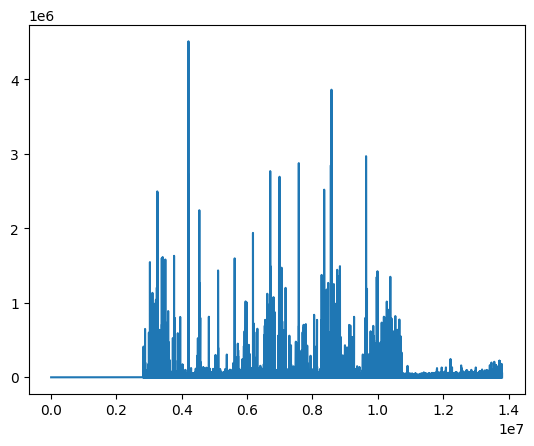

In [4]:
plt.plot(df_original.index,df_original['price']*df_original['volume'])

In [5]:
# CONVERT TIME TO DATETIME FORMAT
df = df_original.copy() #remove the first 9M obs for size management
df.head()

,date,time,price,volume
0,01/03/2000,08:30:34.000,1496.4,0
1,01/03/2000,08:30:36.000,1496.0,0
2,01/03/2000,08:30:37.000,1495.5,0
3,01/03/2000,08:30:46.000,1495.0,0
4,01/03/2000,08:30:53.000,1495.5,0


In [6]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%Y %H:%M:%S.%f')
df['date'] = pd.to_datetime(df['date'])

In [7]:
#TAKE ONLY 10 YEARS (2005-2015) OF DATA
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2005) & (df['year'] <= 2015)]
df = df.drop(columns=['date', 'time','year'])

In [8]:
df

,price,volume,datetime
4563224,1213.5,3,2005-01-02 17:00:06.000
4563225,1213.2,2,2005-01-02 17:00:09.000
4563226,1213.0,1,2005-01-02 17:00:09.000
4563227,1212.9,1,2005-01-02 17:00:09.000
4563228,1213.1,1,2005-01-02 17:00:31.000
...,...,...,...
13616443,2036.6,1,2015-12-31 15:32:27.774
13616444,2036.4,1,2015-12-31 15:35:38.168
13616445,2036.5,1,2015-12-31 15:35:38.168
13616446,2036.1,1,2015-12-31 15:38:33.850


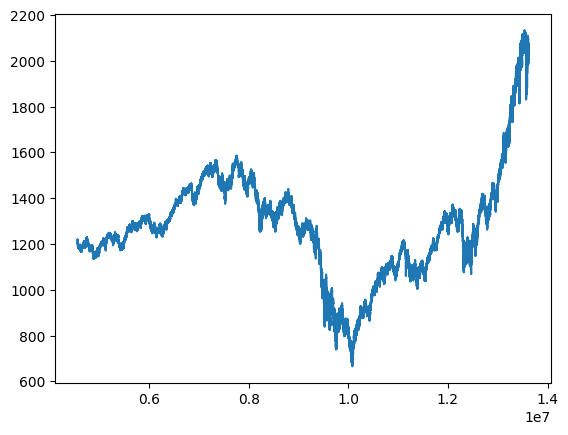

In [9]:
#VISUALLY CHECK FOR PIRCE DISCONTINUITIES AT ROLL DATES
plt.plot(df.index, df.price)

In [10]:
#TICK BARS FUNCTION

def TickBarsDF(df, tick_size):
  df = df.copy()
  df['tick_bar_id'] = df.index // tick_size
  bars = df.groupby('tick_bar_id').agg(
        open_price=('price', 'first'),
        high_price=('price', 'max'),
        low_price=('price', 'min'),
        close_price=('price', 'last'),
        volume=('volume', 'sum'),
        start_time=('datetime', 'first'),
        end_time=('datetime', 'last')
    )
  return bars

#VOLUME BARS FUNCTION

def VolumeBarsDF(df, volume_size):
    bars = []
    cum_vol = 0
    start_idx = 0

    for i, vol in enumerate(df['volume']):
        cum_vol += vol
        if cum_vol >= volume_size:
            bar = df.iloc[start_idx:i+1]
            bars.append({
                'open_price': bar['price'].iloc[0],
                'high_price': bar['price'].max(),
                'low_price': bar['price'].min(),
                'close_price': bar['price'].iloc[-1],
                'volume': bar['volume'].sum(),
                'start_time': bar['datetime'].iloc[0],
                'end_time': bar['datetime'].iloc[-1]
            })
            start_idx = i + 1
            cum_vol = 0

    return pd.DataFrame(bars)

#DOLLAR BARS FUNCTION

def DollarBarsDF(df, dollar_size):
    bars = []
    cum_dollar = 0
    start_idx = 0

    dollar_value = df['price'] * df['volume']

    for i, val in enumerate(dollar_value):
        cum_dollar += val
        if cum_dollar >= dollar_size:
            bar = df.iloc[start_idx:i+1]
            bars.append({
                'open_price': bar['price'].iloc[0],
                'high_price': bar['price'].max(),
                'low_price': bar['price'].min(),
                'close_price': bar['price'].iloc[-1],
                'volume': bar['volume'].sum(),
                'start_time': bar['datetime'].iloc[0],
                'end_time': bar['datetime'].iloc[-1]
            })
            start_idx = i + 1
            cum_dollar = 0

    return pd.DataFrame(bars)

In [11]:
#CALL BAR FUNCTIONS TO HAVE BAR BASED DFS
dollar_bars_df = DollarBarsDF(df,15000) #15k USD of volume exchanged
volume_bars_df = VolumeBarsDF(df,10) #10 stockes exchanged
tick_bars_df = TickBarsDF(df,12) #13 ticks


#number sets to have more or less the same number of total bars

In [12]:
print(f'Size of tick bars: {len(tick_bars_df)}')
print(f'Size of volume bars: {len(volume_bars_df)}')
print(f'Size of dollar bars: {len(dollar_bars_df)}')

Size of tick bars: 754436
Size of volume bars: 812831
Size of dollar bars: 679640


In [13]:
dollar_bars_df.reset_index(drop=True, inplace=True)
volume_bars_df.reset_index(drop=True, inplace=True)
tick_bars_df.reset_index(drop=True, inplace=True)

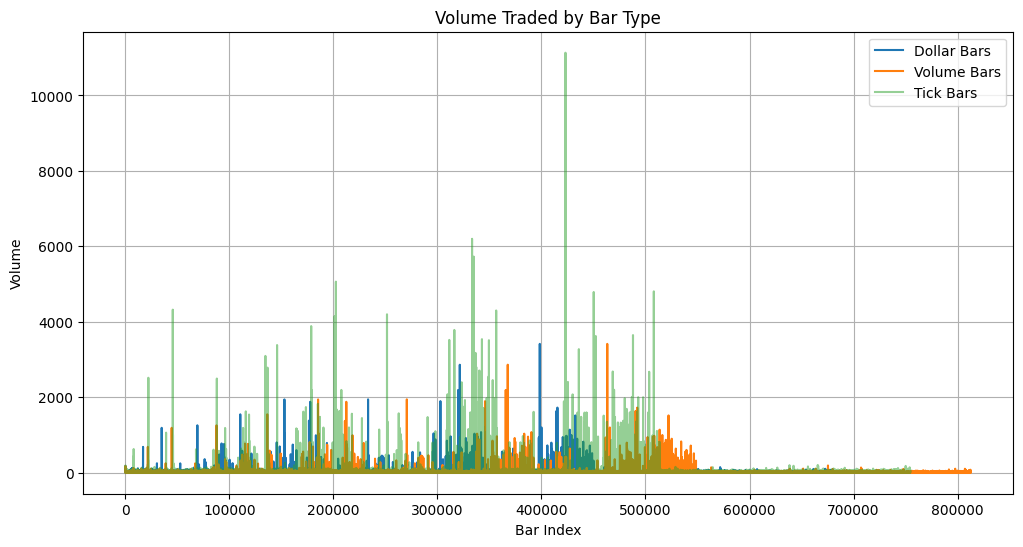

In [14]:
plt.figure(figsize=(12, 6))

plt.plot(dollar_bars_df.index, dollar_bars_df['volume'], label='Dollar Bars')
plt.plot(volume_bars_df.index, volume_bars_df['volume'], label='Volume Bars')
plt.plot(tick_bars_df.index, tick_bars_df['volume'], label='Tick Bars',alpha=0.5)

plt.xlabel('Bar Index')
plt.ylabel('Volume')
plt.title('Volume Traded by Bar Type')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# FUCNTION TO CUMULATIVELY COUNT WEEKS
def compute_cumulative_weekly_counts(bars_df, time_column='end_time'):
    """
    Given a bars DataFrame with an 'end_time' datetime column,
    compute the cumulative week number and count bars per week.

    Returns:
        weekly_counts: pd.Series with index = cumulative week and values = counts
        bars_df: updated DataFrame with a new 'cum_week' column
    """
    bars_df = bars_df.sort_values(time_column)
    # Create weekly period
    bars_df['week'] = bars_df[time_column].dt.to_period('W')
    # Map to cumulative weeks
    week_order = {week: i+1 for i, week in enumerate(sorted(bars_df['week'].unique()))}
    bars_df['cum_week'] = bars_df['week'].map(week_order)
    # Compute counts
    weekly_counts = bars_df.groupby('cum_week').size()
    return weekly_counts, bars_df


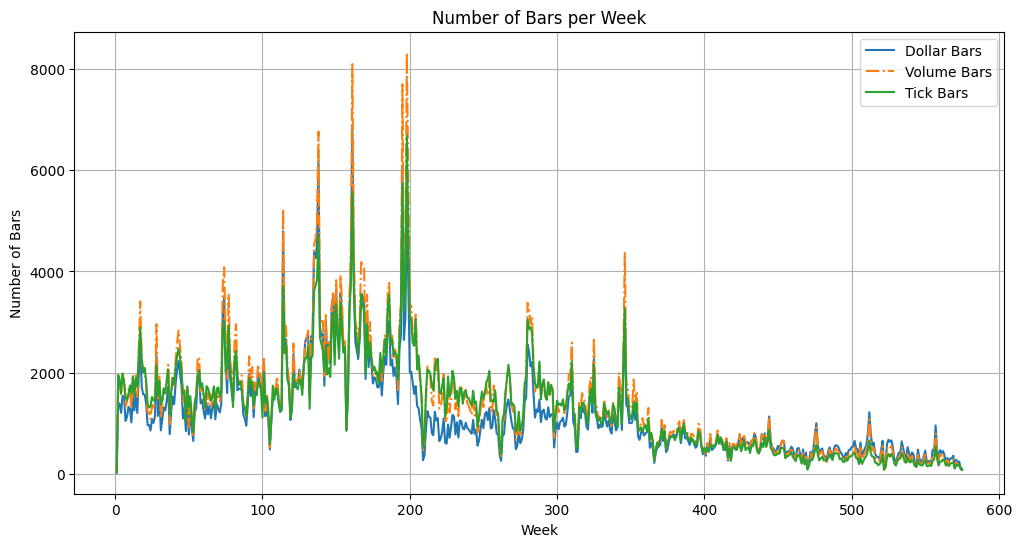

In [16]:
#COUNT THE BARS IN EACH WEEK AND PLOT THE TIME SERIES - CUMULATIVE WEEKS
dollar_bar_week_series = compute_cumulative_weekly_counts(dollar_bars_df)[0]
volume_bar_week_series = compute_cumulative_weekly_counts(volume_bars_df)[0]
tick_bar_week_series = compute_cumulative_weekly_counts(tick_bars_df)[0]

plt.figure(figsize=(12, 6))

plt.plot(dollar_bar_week_series.index, dollar_bar_week_series.values, label='Dollar Bars')
plt.plot(volume_bar_week_series.index, volume_bar_week_series.values, label='Volume Bars',linestyle ='-.')
plt.plot(tick_bar_week_series.index, tick_bar_week_series.values, label='Tick Bars')

plt.xlabel('Week')
plt.ylabel('Number of Bars')
plt.title('Number of Bars per Week')
plt.legend()
plt.grid(True)
plt.show()

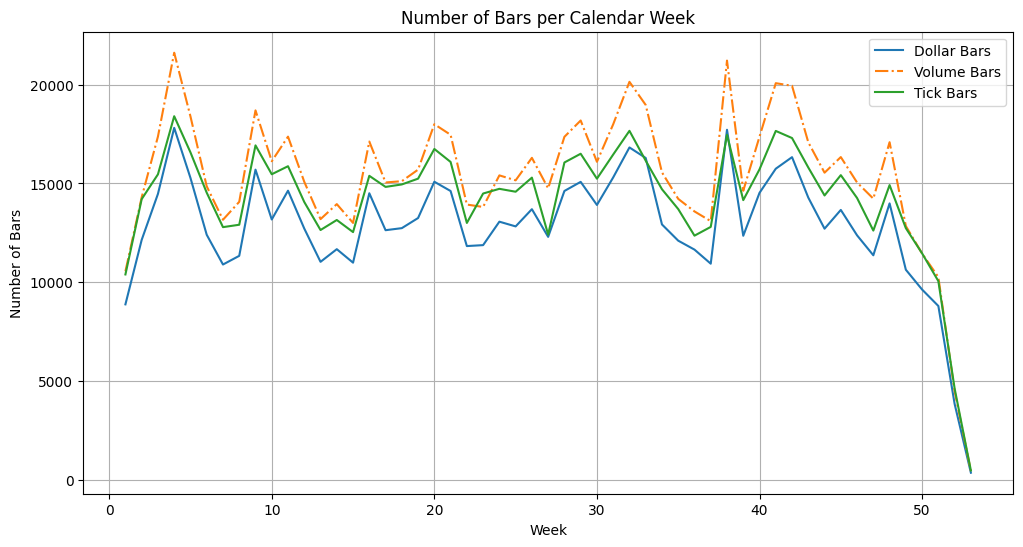

In [17]:
def compute_weekly_counts(df):
    df = df.copy()
    # Extract ISO year and week number
    df['week'] = df['end_time'].dt.isocalendar().week

    # Group by year and week and count bars
    weekly_counts = df.groupby('week').size()

    # Create a datetime index for plotting, by using the Monday of each week

    return weekly_counts

# Compute weekly counts for each bar type
dollar_bar_week_series = compute_weekly_counts(dollar_bars_df)
volume_bar_week_series = compute_weekly_counts(volume_bars_df)
tick_bar_week_series = compute_weekly_counts(tick_bars_df)

plt.figure(figsize=(12, 6))

plt.plot(dollar_bar_week_series.index, dollar_bar_week_series.values, label='Dollar Bars')
plt.plot(volume_bar_week_series.index, volume_bar_week_series.values, label='Volume Bars', linestyle='-.')
plt.plot(tick_bar_week_series.index, tick_bar_week_series.values, label='Tick Bars')

plt.xlabel('Week')
plt.ylabel('Number of Bars')
plt.title('Number of Bars per Calendar Week')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# COMPUTING SERIAL CORRELATION

def compute_serial_correlation(bars_df, method_name=""):
    """
    Compute simple returns and lag-1 serial correlation.
    Prints the result and returns the correlation value.
    """
    #sort by time
    bars_df = bars_df.sort_values('end_time')
    #returns
    bars_df['returns'] = bars_df['close_price'].pct_change()
    returns = bars_df['returns'].dropna()
    #lagged returns
    lagged_returns = returns.shift(1).dropna()
    aligned_returns = returns.iloc[1:]
    # Compute correlation
    serial_corr = aligned_returns.corr(lagged_returns)

    print(f"Serial correlation (lag-1) for {method_name}: {serial_corr:.5f}")

    return serial_corr


In [19]:
dollar_serial_corr = compute_serial_correlation(dollar_bars_df, "Dollar Bars")
volume_serial_corr = compute_serial_correlation(volume_bars_df, "Volume Bars")
tick_serial_corr = compute_serial_correlation(tick_bars_df, "Tick Bars")

Serial correlation (lag-1) for Dollar Bars: -0.00487
Serial correlation (lag-1) for Volume Bars: -0.00520
Serial correlation (lag-1) for Tick Bars: 0.00361


In [20]:
# VARIANCE OF MONTHLY VARIANCE

def add_month_column(bars_df):
    bars_df = bars_df.copy()
    bars_df['month'] = bars_df['end_time'].dt.to_period('M')
    return bars_df

def compute_monthly_variances(bars_df):
    monthly_variances = bars_df.groupby('month')['returns'].var()
    return monthly_variances

def variance_of_variances(monthly_variances):
    return monthly_variances.var()

def analyze_variance_of_variances(bars_df, method_name=""):
    if 'returns' not in bars_df.columns:
        bars_df['returns'] = bars_df['close_price'].pct_change()
    bars_df = bars_df.sort_values('end_time')
    bars_df = add_month_column(bars_df)
    monthly_variances = compute_monthly_variances(bars_df)
    var_of_vars = variance_of_variances(monthly_variances)
    print(f"Variance of monthly variances for {method_name}: {var_of_vars:.8f}")

    return var_of_vars


In [21]:
vov_tick = analyze_variance_of_variances(tick_bars_df, "Tick Bars")
vov_volume = analyze_variance_of_variances(volume_bars_df, "Volume Bars")
vov_dollar = analyze_variance_of_variances(dollar_bars_df, "Dollar Bars")

Variance of monthly variances for Tick Bars: 0.00000000
Variance of monthly variances for Volume Bars: 0.00000000
Variance of monthly variances for Dollar Bars: 0.00000000


##### Exercise 2: CUSUM Method

Form E-mini S&P 500 futures dollar bars:
- Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the bands
to outside the bands).
- Now sample those bars using a CUSUM filter, where {yt} are returns and
h = 0.05. How many samples do you get?
- Compute the rolling standard deviation of the two-sampled series. Which
one is least heteroscedastic? What is the reason for these results?

In [22]:
# CONVERT TIME TO DATETIME FORMAT
df = df_original.copy() #remove the first 9M obs for size management
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%Y %H:%M:%S.%f')
df['date'] = pd.to_datetime(df['date'])
#TAKE ONLY 5 YEARS (2005-2010) OF DATA
df['year'] = df['date'].dt.year
df = df[(df['year'] >= 2005) & (df['year'] <= 2010)]
df = df.drop(columns=['date', 'time','year'])

Text(0, 0.5, 'S&P500 Contracts Exchanged')

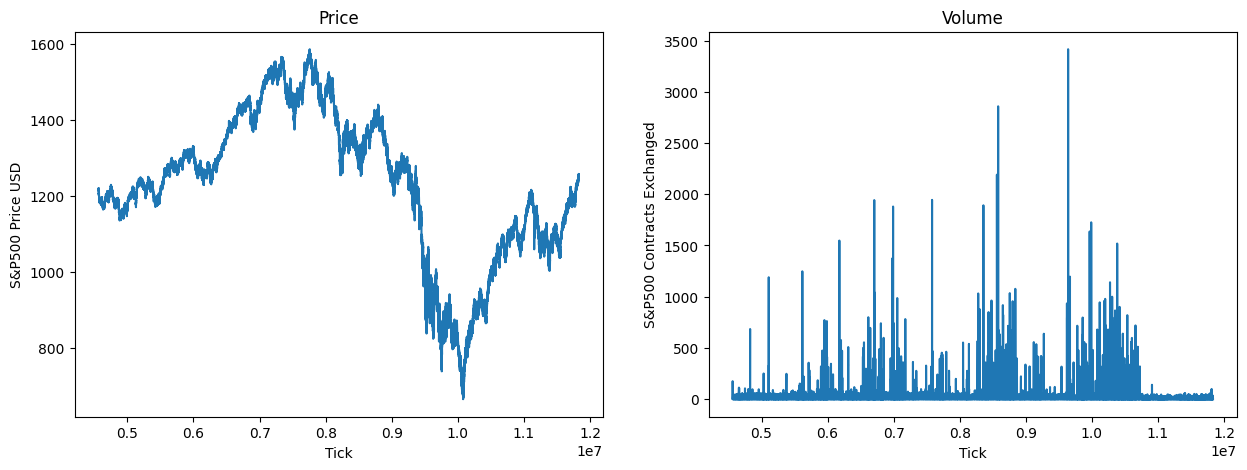

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(df.index,df['price'])
axs[0].set_title('Price')
axs[1].plot(df.index,df['volume'])
axs[1].set_title('Volume')

axs[0].set_xlabel('Tick')
axs[0].set_ylabel('S&P500 Price USD')

axs[1].set_xlabel('Tick')
axs[1].set_ylabel('S&P500 Contracts Exchanged')


In [24]:
# CONVERT IN DOLLAR BARS
df = DollarBarsDF(df,20000) #each bar represents 20k USD exchanged
df

,open_price,high_price,low_price,close_price,volume,start_time,end_time
0,1213.5,1213.5,1212.9,1213.0,17,2005-01-02 17:00:06,2005-01-02 17:01:30
1,1213.0,1213.4,1213.0,1213.3,17,2005-01-02 17:01:30,2005-01-02 17:02:25
2,1213.3,1214.0,1213.3,1214.0,21,2005-01-02 17:02:30,2005-01-02 17:05:39
3,1214.0,1214.0,1213.6,1213.7,18,2005-01-02 17:05:39,2005-01-02 17:15:24
4,1213.8,1214.2,1213.8,1214.0,31,2005-01-02 17:16:19,2005-01-02 17:33:57
...,...,...,...,...,...,...,...
400489,1251.2,1251.4,1250.7,1250.7,16,2010-12-31 07:05:17,2010-12-31 07:12:38
400490,1250.7,1250.7,1250.2,1250.4,16,2010-12-31 07:12:38,2010-12-31 07:17:42
400491,1250.4,1250.4,1250.3,1250.3,16,2010-12-31 07:17:42,2010-12-31 07:17:42
400492,1250.3,1251.3,1250.3,1251.2,22,2010-12-31 07:17:42,2010-12-31 07:43:55


In [25]:
#COMPUTE BOLLINGER BANDS
df['ma'] = df['close_price'].rolling(20).mean() #moving average
df['std'] = df['close_price'].rolling(20).std() #moving std
#bands not as k*sigma but as a % of MA as requested by the exercise
band_width = 0.05
df['upper_band'] = df['ma']*(1+band_width) #upper BB
df['lower_band'] = df['ma']*(1-band_width) #lower BB

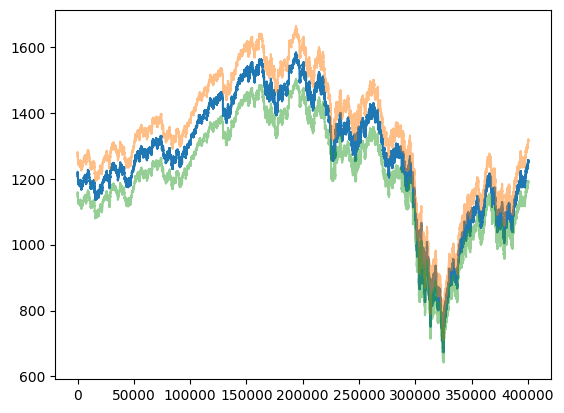

In [26]:
plt.plot(df.index,df['close_price'])
plt.plot(df.index,df['upper_band'],alpha=0.5)
plt.plot(df.index,df['lower_band'],alpha=0.5)

In [33]:
up_cross = (df.close_price > df.upper_band).sum()
down_cross = (df.close_price < df.lower_band).sum()
print(f'Number of times the price crossed the upper band: {up_cross}')
print(f'Number of times the price crossed the lower band: {down_cross}')
#def run_BB()

Number of times the price crossed the upper band: 14
Number of times the price crossed the lower band: 30


In [36]:
df

,open_price,high_price,low_price,close_price,volume,start_time,end_time,ma,std,upper_band,lower_band
0,1213.5,1213.5,1212.9,1213.0,17,2005-01-02 17:00:06,2005-01-02 17:01:30,NaN,NaN,NaN,NaN
1,1213.0,1213.4,1213.0,1213.3,17,2005-01-02 17:01:30,2005-01-02 17:02:25,NaN,NaN,NaN,NaN
2,1213.3,1214.0,1213.3,1214.0,21,2005-01-02 17:02:30,2005-01-02 17:05:39,NaN,NaN,NaN,NaN
3,1214.0,1214.0,1213.6,1213.7,18,2005-01-02 17:05:39,2005-01-02 17:15:24,NaN,NaN,NaN,NaN
4,1213.8,1214.2,1213.8,1214.0,31,2005-01-02 17:16:19,2005-01-02 17:33:57,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
400489,1251.2,1251.4,1250.7,1250.7,16,2010-12-31 07:05:17,2010-12-31 07:12:38,1253.430,1.692429,1316.10150,1190.75850
400490,1250.7,1250.7,1250.2,1250.4,16,2010-12-31 07:12:38,2010-12-31 07:17:42,1253.210,1.788236,1315.87050,1190.54950
400491,1250.4,1250.4,1250.3,1250.3,16,2010-12-31 07:17:42,2010-12-31 07:17:42,1252.925,1.774342,1315.57125,1190.27875
400492,1250.3,1251.3,1250.3,1251.2,22,2010-12-31 07:17:42,2010-12-31 07:43:55,1252.720,1.721566,1315.35600,1190.08400


In [34]:
def run_CUSUM(series, threshold):
  series = series.copy()
  seires = series.pct_change()
  t_events = []
  y = np.asarray(series)
  mu = 0
  s_plus, s_minus = np.zeros(len(y)), np.zeros(len(y))
  for i in range(1,len(y)):
    mu_norm = mu/i
    s_plus[i] = max(0, s_plus[i-1] + y[i] - mu_norm)
    s_minus[i] = max(0, s_minus[i-1] - y[i] + mu_norm)
    mu = mu + y[i]

    if s_plus[i] > threshold:
      t_events.append(i)
      s_plus[i] = 0
    elif s_minus[i] > threshold:
      t_events.append(i)
      s_minus[i] = 0

  return t_events


In [39]:
df['returns'] = df.close_price.pct_change()

In [40]:
cusum_events = len(run_CUSUM(df['returns'],0.05))
print(cusum_events)

161


In [41]:
#THIS WAY WE CAN INSTEAD KEEP THE DFS WHERE CROSSINGS OCCURR
def sample_by_bollinger(df, window=20, band_width=0.05):
    """
    Sample rows where price crosses outside Bollinger bands of width ±band_width around
    rolling mean (i.e., mean ± 5% here).

    Args:
      df: DataFrame with 'close_price' and datetime index or column
      window: rolling window size for moving average
      band_width: band width as fraction of rolling mean (e.g. 0.05 = 5%)

    Returns:
      sampled_df: DataFrame with only rows where close_price crosses outside bands
    """
    df = df.copy()
    df['rolling_mean'] = df['close_price'].rolling(window).mean()
    df['upper_band'] = df['rolling_mean'] * (1 + band_width)
    df['lower_band'] = df['rolling_mean'] * (1 - band_width)

    #boolean if prices at time t are inside the bands
    inside_band = (df['close_price'] >= df['lower_band']) & (df['close_price'] <= df['upper_band'])
    #shift at t-1 to see if price was inside
    inside_prev = inside_band.shift(1)
    #crossing happens if price was inside last bar but now outside
    cross_up = (inside_prev == True) & (df['close_price'] > df['upper_band'])
    cross_down = (inside_prev == True) & (df['close_price'] < df['lower_band'])
    #or corss ups or downs....
    crossings = cross_up | cross_down
    #take rows where crossing == True
    sampled_df = df.loc[crossings].copy()
    return sampled_df


def sample_by_cusum(df, threshold=0.05):
    """
    Apply symmetric CUSUM filter on returns and sample rows where filter triggers.

    Args:
      df: DataFrame with 'close_price' and datetime index or column
      threshold: h, threshold for CUSUM filter (e.g. 0.05)

    Returns:
      sampled_df: DataFrame sampled at detected CUSUM event timestamps
    """
    df = df.copy()
    df['returns'] = df['close_price'].pct_change()
    #initialize values
    s_pos = 0.0
    s_neg = 0.0
    s_pos_list = []
    s_neg_list = []
    event_indices = []
    #use expanding mean for E(y(t-1))
    returns = df['returns'].fillna(0).values
    mean_returns = pd.Series(returns).expanding().mean().values

    for t in range(1, len(returns)):
        y_t = returns[t]
        e_y = mean_returns[t-1]

        s_pos = max(0, s_pos + y_t - e_y)
        s_neg = min(0, s_neg + y_t - e_y)

        if s_pos > threshold:
            event_indices.append(t)
            s_pos = 0
        elif abs(s_neg) > threshold:
            event_indices.append(t)
            s_neg = 0

    sampled_df = df.iloc[event_indices].copy()
    return sampled_df


In [42]:
df_bb = sample_by_bollinger(df)
df_cusum = sample_by_cusum(df)

In [43]:
bb_series_std = df_bb.returns.std()
cusum_series_std = df_cusum.returns.std()
print(f'BB std: {bb_series_std}')
print(f'CUSUM std: {cusum_series_std}')

BB std: 0.0632426238079043
CUSUM std: 0.023808153809717555


- The CUSUM sampling leads to much lower rolling volatility — it's less heteroscedastic (less variation in volatility over time).

- The Bollinger bands sampling picks more volatile or noisier points, hence the higher rolling std.

*Why?*

CUSUM filters trigger based on cumulative changes that cross a threshold, effectively filtering out noise and focusing on significant moves. Bollinger bands just look at price crossing fixed bands, so it might catch more noise and short-term fluctuations, leading to higher variability in sampled returns.



### Labeling

We learned how to form a structured matrix X of financial features given an unstructured dataset.

Unsupervised learning can elarn patterns from X, on the other hand supervised models require an array of labels (y) so that we can train a model and forecast future labels.

#### Fixed-Time Horizon Method

Take a feature matrix X of I rows drawn from some bars t = 1,..., T>=I.

An observation X(i) is assigned to label y(i) as:

We drop index i for simplicity...

- y = -1 if r(t(0),t(0+h)) < τ
- y = 0 if abs(r(t(0),t(0+h))) >= τ
- y = 1 if r(t(0),t(0+h)) > τ

Where r(t(0),t(0+h)) = p(t(0+h))/p(t(0)) - 1; τ is a pre-defined threshold; and t(0+h) is the index of the h-th bar after t(0).

Usually used with time bars, hence, h represents a fixed-time horizon.

Unfortunately, time bars suffer issues:
- Do not exhibit nice statistical properties
- The same threshold τ is used regardless the volatility

Solution?
- Use dollar or volume bars (volatility closer to be constant)
- Label per deviation fo returns σ(t(0)) estimated using a rolling exponentiaò weighted standard deviation of returns

Still... it is unrealistic to build a strategy that profits from positions that might have been stopped (TP, SL, Margin calls...)

#### Computing Dynamic Threshold

We said it is better to set TP and SL as function of the risk involved in that specific trade. We can compute intraday daily volatility for a series of prices using an exponentially weighted moving standard deviation (EWMA)

In [44]:
df = df_original.copy()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%Y %H:%M:%S.%f')
df['date'] = pd.to_datetime(df['date'])
#TAKE ONLY 2010 DATA
df['year'] = df['date'].dt.year
df = df[(df['year'] > 2009) & (df['year'] <= 2010)]

In [45]:
df.date.unique()

<DatetimeArray>
['2010-01-03 00:00:00', '2010-01-04 00:00:00', '2010-01-05 00:00:00',
 '2010-01-06 00:00:00', '2010-01-07 00:00:00', '2010-01-08 00:00:00',
 '2010-01-10 00:00:00', '2010-01-11 00:00:00', '2010-01-12 00:00:00',
 '2010-01-13 00:00:00',
 ...
 '2010-12-20 00:00:00', '2010-12-21 00:00:00', '2010-12-22 00:00:00',
 '2010-12-23 00:00:00', '2010-12-26 00:00:00', '2010-12-27 00:00:00',
 '2010-12-28 00:00:00', '2010-12-29 00:00:00', '2010-12-30 00:00:00',
 '2010-12-31 00:00:00']
Length: 310, dtype: datetime64[ns]

In [46]:
df.set_index('datetime', inplace=True)
df.head()

,date,time,price,volume,year
datetime,,,,,
2010-01-03 17:00:00,2010-01-03,17:00:00.000,1113.2,1,2010
2010-01-03 17:00:00,2010-01-03,17:00:00.000,1113.2,1,2010
2010-01-03 17:00:00,2010-01-03,17:00:00.000,1113.2,1,2010
2010-01-03 17:00:00,2010-01-03,17:00:00.000,1113.2,1,2010
2010-01-03 17:00:00,2010-01-03,17:00:00.000,1113.2,1,2010


In [47]:
def getDailyVol(close, span=100):
    ''' takes closing prices as argument and returns
    the EWMA of the close price series

    MAKES SURE THE INDEX IS THE TIMESTAMP AND THE INDEX HAS NOT DUPLICATES
    '''
    #check if hte datetime index has unique labels (no trades at the same instant)
    if not close.index.is_unique:
        close = close.groupby(close.index).last()
    #make sure to group by transaction (tick rows) occuredd in the same exact second if not we
    #wwill have duplicated index :(
    close = close.groupby(close.index).last()
    close.index.is_unique

    #find the position of the row having a timestamp which is 1 day away (as close as possible) fromthe current timestamp
    df0 = close.index.searchsorted(close.index-pd.Timedelta(days=1))
    #filter in only postitie indexes
    df0 = df0[df0 > 0]
    #create a series with index timestamp and column the timestamp of one (as close as possible to) day later
    df0 = pd.Series(close.index[df0 - 1], index=close.index[close.shape[0] - df0.shape[0]:])
    #compute daily returns
    df0 = close.loc[df0.index] / close.loc[df0.values].values - 1
    #compute EWMAù
    span = 100
    df0 = df0.ewm(span).std()
    return df0


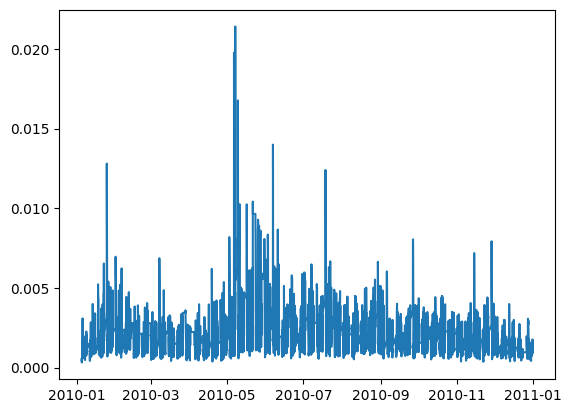

In [48]:
daily_vol = getDailyVol(df.price)
plt.plot(daily_vol)

#### Triple-Barrier Method

We set two horizontal barriers defined by the TP and SL points (dynamic functins of estimated volatility) and one vertical barrier defined in terms of the numbers of bars elaspsed after a position has been taken.

If the upper (lower) barrier is touched we label 1(-1), otherwise if the vertical one is touched first we label 0.

This method is path-dependent... what?

To label an obs we must take into account the entire path spanning between t(0) and t(0+h) (h is the vertical barrier). We denote t(1) the time needed to touch a bar (t(1) <= t(0+h)) and r(t(0),t(1)) the return between t(1) and t(0). Note that the horizontal barriers are not necessarily symmetric.

In [49]:
def applyTPSLOnT1(close, events, tpsl, molecule):
    """
    close = pd Series of prices indexed by datetime
    events = DataFrame with at least:
      - t1: timestamp when event ends (vertical barrier)
      - trgt: target return for TP/SL
      - side: -1/1 (short/long)
    tpsl = (tp, sl) tuple, e.g. (1,1)
    molecule = subset of indices (for parallelization) --> you can slice and then concatenate later
    """
    events_ = events.loc[molecule]
    out = events_[['t1']].copy(deep=True)

    # profit taking threshold
    if tpsl[0] > 0: #could be also
        tp = tpsl[0] * events_['trgt'] #all trgt (as tp is 1 or 0 without tp)
    else:
        tp = pd.Series(index=events_.index)  # all NaNs

    # stop loss threshold (same logic as tp)
    if tpsl[1] > 0:
        sl = -tpsl[1] * events_['trgt']
    else:
        sl = pd.Series(index=events_.index)
    #loop in the events after filling the last rows due to NaN

    #loc is the start time
    #t1 is the vertical barrier ti,e
    for loc, t1 in events_['t1'].fillna(close.index[-1]).items():
        df0 = close[loc:t1] #prices between loc and t1
        df0 = (df0 / close[loc] - 1) * events_.at[loc, 'side'] #calculate returns and multiply by side (short or long)
        #df0[df0 < sl[loc]] gives all timestamps where returns fell below the SL level.
        #.index.min() gets the earliest timestamp where this happened.
        out.loc[loc, 'sl'] = df0[df0 < sl[loc]].index.min()
        #same logic applies here....
        out.loc[loc, 'tp'] = df0[df0 > tp[loc]].index.min()

    return out

#convert the dates to label
def addLabelFromTPSL(out):
    label = pd.Series(0, index=out.index)
    label[out['tp'].notnull()] = 1
    label[out['sl'].notnull()] = -1
    return label


 Three useful configurations:
- [1,1,1]: This is the standard setup, where we define three barrier exit conditions. We would like to realize a profit, but we have a maximum tolerance for
losses and a holding period.
-[0,1,1]: In this setup, we would like to exit after a number of bars, unless we
are stopped-out.
- [1,1,0]: Here we would like to take a profit as long as we are not stopped-out.
This is somewhat unrealistic in that we are willing to hold the position for as
long as it takes.

 Three less realistic configurations:
- [0,0,1]: This is equivalent to the fixed-time horizon method. It may still be
useful when applied to volume-, dollar-, or information-driven bars, and multiple forecasts are updated within the horizon.
- [1,0,1]: A position is held until a profit is made or the maximum holding
period is exceeded, without regard for the intermediate unrealized losses.
- [1,0,0]: A position is held until a profit is made. It could mean being locked
on a losing position for years.

 Two illogical configurations:
- [0,1,0]: This is an aimless configuration, where we hold a position until we
are stopped-out.
- [0,0,0]: There are no barriers. The position is locked forever, and no label is
generated.

**Case 1**

Label the entire dataset using TBM (we will we later a pipeline were CUSUM is used as a filter to detect important events before), with a constant target for tp/sl and long only


In [50]:
df = df_original.copy()
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%m/%d/%Y %H:%M:%S.%f')
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[(df['year'] > 2009) & (df['year'] <= 2010)]

#get a tructured dollar bar df
df = DollarBarsDF(df,500000)
df = df.set_index('end_time')
df.index.rename('datetime', inplace=True)

In [51]:
close = df.close_price #series of closing prics indexed by datetime
#events df with same index ad close (cause here we dont filter out before specific events)
events = pd.DataFrame(index = close.index)
events['t1'] = close.index.to_series().shift(-10) #set vert barrier 10 bars ahead
events['trgt'] = 0.02 #target 2%
events['side'] = 1  #long only
tpsl_here = (1,1) #symmetric positioning tp and sl



In [52]:
#find dates for teh lables
out = applyTPSLOnT1(close, events, tpsl = tpsl_here , molecule=events.index)
#transform dates into one series of labelling
label = addLabelFromTPSL(out)
label

,0
datetime,
2010-01-04 01:04:26,0
2010-01-04 03:41:19,0
2010-01-04 06:13:12,0
2010-01-04 07:21:55,0
2010-01-04 08:12:05,0
...,...
2010-12-30 03:16:12,0
2010-12-30 04:42:02,0
2010-12-30 05:59:09,0


#### Learning Side and Size

We are interested in learning the side of a
bet when we do not have an underlying model to set the sign of our position (long or short). Under such circumstance, we cannot differentiate between a profit-taking barrier and a stop-loss barrier, since that requires knowledge of the side. Learning the
side implies that either there are no horizontal barriers or that the horizontal barriers must be symmetric.

In [53]:
def getEvents(close, tEvents, trgt, minRet, numThreads, t1=False):
  '''
  close: price series indexed by datetime
  tEvents: list of datetime indices marking when to start each event --> eg produced by sampling procedures
  tpsl: multiplier tuple for tp/sl
  trgt: pd series of target volatility for each timestamp
  minRet: minimal return required to consider the event
  numThreads: how many threads to use for multiprocessing
  t1: optional precomputed max holding period forr each event (if false sets to NaN -- no limit)'''
  #restric trgt series only to the events we are interest in
  trgt = trgt.loc[tEvents]
  #rescrict more only to events with returns higher than minRet
  trgt = trgt[trgt > minRet]
  #if vertical barrier is not present create a series of NaT
  if t1 is False:
    t1 = pd.Series(index=trgt.index, data=pd.NaT)
  #set side = 1 (long) everywhere
  side_ = pd.Series(1, index = trgt.index)
  #build events df with columns t1, trgt, side dropping all rows where trgt did not met minRet target
  events = pd.concat({'t1': t1, 'trgt': trgt, 'side': side_}, axis=1).dropna(subset='trgt')

  #call a multiprocessor wrapper
  df0 = mpPandasObj(
    func=applyTPSLOnT1,  #function TBM
    pdObj=('molecule', events.index), #splits molecule into chuncks
    numThreads=numThreads, #num of chuncks
    close=close,
    events=events,
    tpsl=[tpsl, tpsl])

  #Combines the vertical barrier (from original t1) with whichever came first among tp or sl.
  #Uses min(axis=1) → gets earliest of the three times (TP, SL, original t1).
  events['t1'] = df0.dropna(how='all').min(axis=1) # pd.min ignores nan
  events = events.drop('side', axis=1)
  return events

import pandas as pd

def mpPandasObj(func, pdObj, numThreads=24, mpBatches=1, linMols=True, **kargs):
    """
    Parallelize jobs, return a DataFrame or Series

    Parameters
    ----------
    func : function
        Function to be parallelized. Must accept argument named by pdObj[0]
        and return DataFrame or Series.
    pdObj : tuple
        (name, list) where
        - name: string name of argument for molecule in func
        - list: list or index of atoms to be grouped into molecules
    numThreads : int
        Number of threads to use.
    mpBatches : int
        Controls the granularity of splitting.
    linMols : bool
        Whether to split linearly (True) or with nested strategy (False).
    kargs : dict
        Additional keyword arguments passed to func.

    Returns
    -------
    DataFrame or Series
    """
    # Split data into parts
    if linMols:
        parts = linParts(len(pdObj[1]), numThreads * mpBatches)
    else:
        parts = nestedParts(len(pdObj[1]), numThreads * mpBatches)

    # Create jobs
    jobs = []
    for i in range(1, len(parts)):
        job = {pdObj[0]: pdObj[1][parts[i-1]:parts[i]], 'func': func}
        job.update(kargs)
        jobs.append(job)

    # Process jobs
    if numThreads == 1:
        out = processJobs_(jobs)
    else:
        out = processJobs(jobs, numThreads=numThreads)

    # Concatenate results
    if isinstance(out[0], pd.DataFrame):
        df0 = pd.DataFrame()
    elif isinstance(out[0], pd.Series):
        df0 = pd.Series()
    else:
        return out

    for i in out:
        df0 = df0.append(i)
    return df0.sort_index()



In [54]:
np.random.seed(42)  # for reproducibility
tEvents = np.random.choice(close.index, size=100, replace=False)
tEvents = pd.to_datetime(sorted(tEvents))  # sort for clarity

# 2️⃣ Calculate rolling volatility (target)
# e.g. 20-period daily volatility using percent returns
rolling_window = 20
returns = close.pct_change()
rolling_vol = returns.rolling(rolling_window).std()

# Use absolute returns if you prefer volatility over standard deviation
# rolling_vol = returns.rolling(rolling_window).apply(lambda x: np.std(x, ddof=1))

# 3️⃣ Build trgt series indexed by datetime
trgt = rolling_vol

# (optionally drop first NaNs due to rolling)
trgt = trgt.dropna()

# Align trgt with tEvents
trgt = trgt.reindex(close.index).ffill()


CANT RUN NOW --- CHAPTER 20 IS ABOUT MULTIPROCESSING !!!!!!!!!

In [55]:
test = getEvents(close, tEvents, trgt, 0.02, 10, t1=False)

NameError: name 'tpsl' is not defined

#### Meta-Labelling

Say you have a system to set the side of the bet, now you need a system to size the position.

We need to know: *how much money I am willing to bet in this position*?

This step is called **meta-labelling** because we want to build a secondary ML model that lerans how to use a primary exogenous model.

SNIPPETS 3.6 and 3.7 to update the GetEvents and GetBins functions.

When do we use meta-labelling?

Binary classification problems present a trade-off between FP and FN errors. In general, increasing the true positive rate will tend to increase its false positive rate.

WAIT WAIT WAIT...

Remember that

- FP: positive instances incorrectly classified
- FN: negative instances incorrectly classified
- TP: positive instances correctly classified
- TN: negative instances correctly classified

Now the:

- TPR = True Positive Rate = positive instances correctly classified/positive instances = TP/(TP+FN) --> proportion of positive instances that were correctly classified as positive by the model

- FPR = False Negative Rate = negative instances incorrecly classfied as positive/negative instances =FP/(FP+TN) --> proportion of positive instances that are inaccurately detected as positive

The trade off between TPR and FPR is plotted in the ROC curve.

Confusion Matrix...

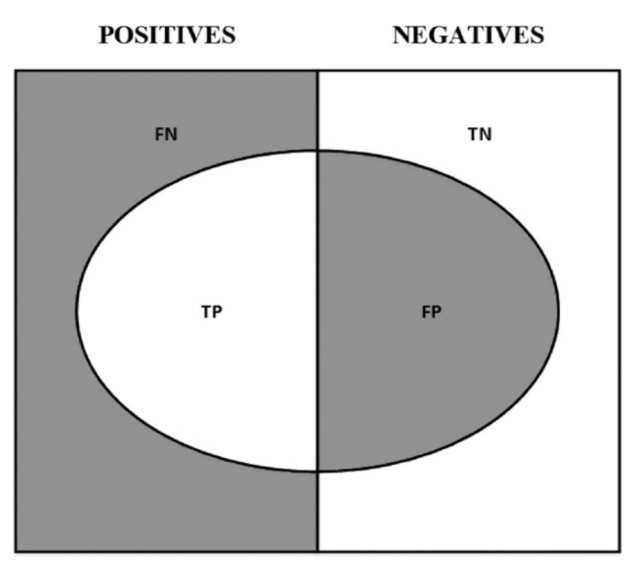

Precision = TP/(TP+FP) = corectly classified positive/all classfied as positive

Recall = TRP = TP/(TP+FN) = correctly classified positive/number of real positives

Accuracy = (TP+TN)/(TP+TN+FN+FP) = correct classficiations/total classifications


Now if we aim to improve the precision by lowering the FP, thsi will result in increasing FN and, hence, decreasing the recall.

In general one wants to maximize (othe r than specified) the F1 score (harmonic average between precision and recall)... meta-labeling is actually used for this purpose! How?

1. Build a model with high recall and low precision --> do not loose opportunities
2. Apply meta-labelling to th epositive predicted by the primary model --> remove opportunities that can be negative

*The result is to reduce the FP.. that is to determine whether we should act or pass on the opportunity that has been presented*

Suppose that you have a series of features that you believe can forecast some prices. Since you do not have a model to determine the side
of each bet, you need to learn both side and size.

You apply what you have learned in Section 3.5, and produce some labels based on the triple-barrier method with sym-metric horizontal barriers. Now you are ready to fit your algorithm on a training set, and evaluate the accuracy of your forecasts on a testing set. Alternatively, you could
do the following:

1. Use your forecasts from the primary model, and generate meta-labels. Remember, horizontal barriers do not need to be symmetric in this case.

2. Fit your model again on the same training set, but this time using the meta-labels you just generated.

3. Combine the “sides” from the first ML model with the “sizes” from the second ML model.

You can always add a meta-labeling layer to any primary model, whether that is an ML algorithm, an econometric equation, a technical trading rule, a fundamental analysis, etc. That includes forecasts generated by a human, solely based on his intuition.

In that case, meta-labeling will help us figure out when we should pursue or dismiss a discretionary call. The features used by such meta-labeling ML algorithm.